#### Test fonctions OpenCV
Lien site web : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html 

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.spatial.distance

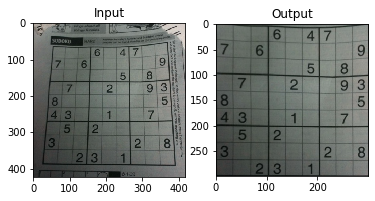

In [4]:
img = cv2.imread('sudoku.jpg')
rows,cols,ch = img.shape
# on donne les 4 points 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

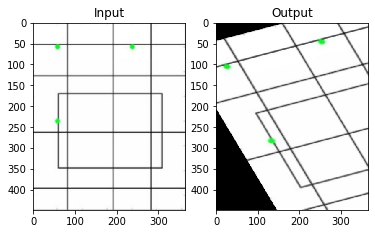

In [5]:
img = cv2.imread('drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

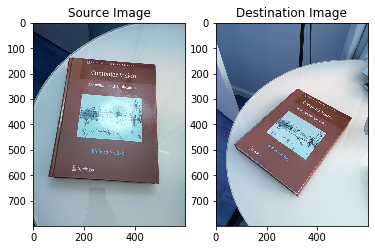

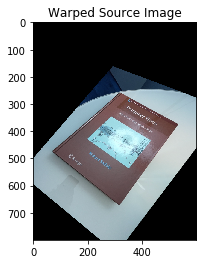

In [6]:
# Read source image.
im_src = cv2.imread('book2.jpg')
# Four corners of the book in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)


# Read destination image.
im_dst = cv2.imread('book1.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

# Calculate Homography
# h est la matrice d'homographie
# A homography can be computed when we have 4 or more corresponding points
h, status = cv2.findHomography(pts_src, pts_dst)
    
# Warp source image to destination based on homography
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
    
# Display images

plt.subplot(121), plt.imshow(im_src),plt.title('Source Image')
plt.subplot(122), plt.imshow(im_dst),plt.title('Destination Image')
plt.show()

plt.imshow(im_out),plt.title('Warped Source Image')
plt.show()


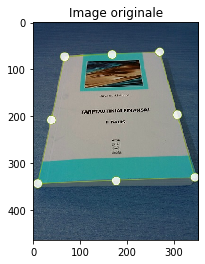

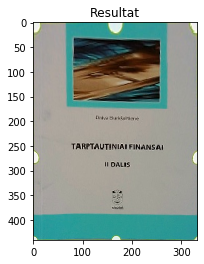

In [7]:
# test code sur stackoverflow : https://stackoverflow.com/questions/38285229/calculating-aspect-ratio-of-perspective-transform-destination-image
img = cv2.imread('test.png')
(rows,cols,_) = img.shape

#image center
u0 = (cols)/2.0
v0 = (rows)/2.0

#detected corners on the original image
p = []
p.append((67,74))
p.append((270,64))
p.append((10,344))
p.append((343,331))

#widths and heights of the projected image
w1 = scipy.spatial.distance.euclidean(p[0],p[1])
w2 = scipy.spatial.distance.euclidean(p[2],p[3])

h1 = scipy.spatial.distance.euclidean(p[0],p[2])
h2 = scipy.spatial.distance.euclidean(p[1],p[3])

w = max(w1,w2)
h = max(h1,h2)

#visible aspect ratio
ar_vis = float(w)/float(h)

#make numpy arrays and append 1 for linear algebra
m1 = np.array((p[0][0],p[0][1],1)).astype('float32')
m2 = np.array((p[1][0],p[1][1],1)).astype('float32')
m3 = np.array((p[2][0],p[2][1],1)).astype('float32')
m4 = np.array((p[3][0],p[3][1],1)).astype('float32')

#calculate the focal disrance
k2 = np.dot(np.cross(m1,m4),m3) / np.dot(np.cross(m2,m4),m3)
k3 = np.dot(np.cross(m1,m4),m2) / np.dot(np.cross(m3,m4),m2)

n2 = k2 * m2 - m1
n3 = k3 * m3 - m1

n21 = n2[0]
n22 = n2[1]
n23 = n2[2]

n31 = n3[0]
n32 = n3[1]
n33 = n3[2]

f = math.sqrt(np.abs( (1.0/(n23*n33)) * ((n21*n31 - (n21*n33 + n23*n31)*u0 + n23*n33*u0*u0) + (n22*n32 - (n22*n33+n23*n32)*v0 + n23*n33*v0*v0))))

A = np.array([[f,0,u0],[0,f,v0],[0,0,1]]).astype('float32')

At = np.transpose(A)
Ati = np.linalg.inv(At)
Ai = np.linalg.inv(A)

#calculate the real aspect ratio
ar_real = math.sqrt(np.dot(np.dot(np.dot(n2,Ati),Ai),n2)/np.dot(np.dot(np.dot(n3,Ati),Ai),n3))

if ar_real < ar_vis:
    W = int(w)
    H = int(W / ar_real)
else:
    H = int(h)
    W = int(ar_real * H)

pts1 = np.array(p).astype('float32')
pts2 = np.float32([[0,0],[W,0],[0,H],[W,H]])

#project the image with the new w/h
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(W,H))

plt.imshow(img),plt.title('Image originale')
plt.show()
plt.imshow(dst),plt.title('Resultat')
plt.show()


### OpenCV install Cmake modules : https://towardsdatascience.com/how-to-install-opencv-and-extra-modules-from-source-using-cmake-and-then-set-it-up-in-your-pycharm-7e6ae25dbac5 